In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r'C:\Users\Debora\Downloads\Electric_Vehicle_Population_Data.csv')


df1=df.copy()
#Filtering done based on CAFV Eligible
df1 = df1[df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']
df1


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124704,1N4AZ0CP0F,Chelan,Chelan,WA,98816.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,12.0,134852315,POINT (-120.01454 47.83985),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
124705,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,44.0,110108841,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
124708,WBY1Z4C54G,King,Seattle,WA,98144.0,2016,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,37.0,148555137,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


<Axes: >

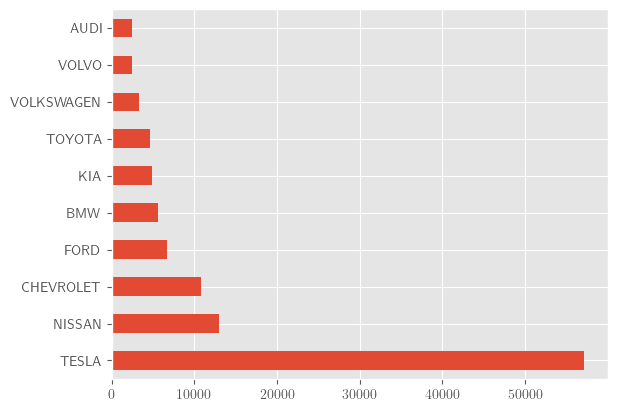

In [2]:
#Top 10 Car Manufacturers
top10make= df['Make'].value_counts()
top10make[:10].plot(kind='barh', rot=0)


<Axes: >

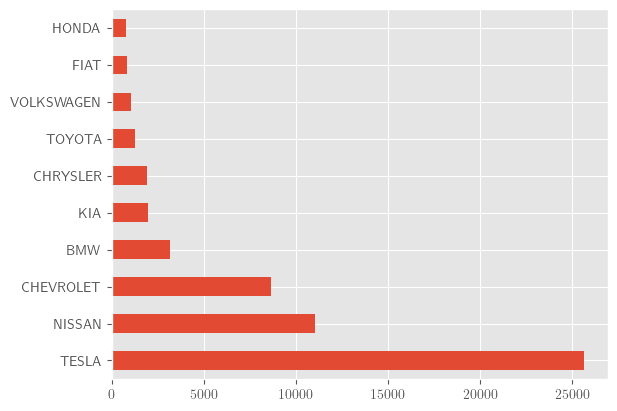

In [3]:
#Top 10 Car Manufacturers, only CAFV Eligible vehicles included
top10make= df1['Make'].value_counts()
top10make[:10].plot(kind='barh', rot=0)

<Axes: >

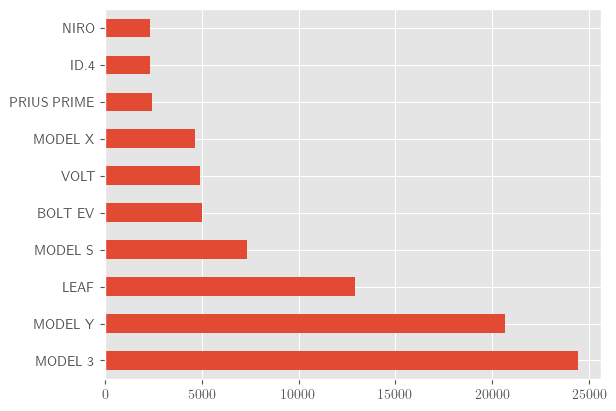

In [4]:
#top10 Models sold
top10make= df['Model'].value_counts()
top10make[:10].plot(kind='barh', rot=0)

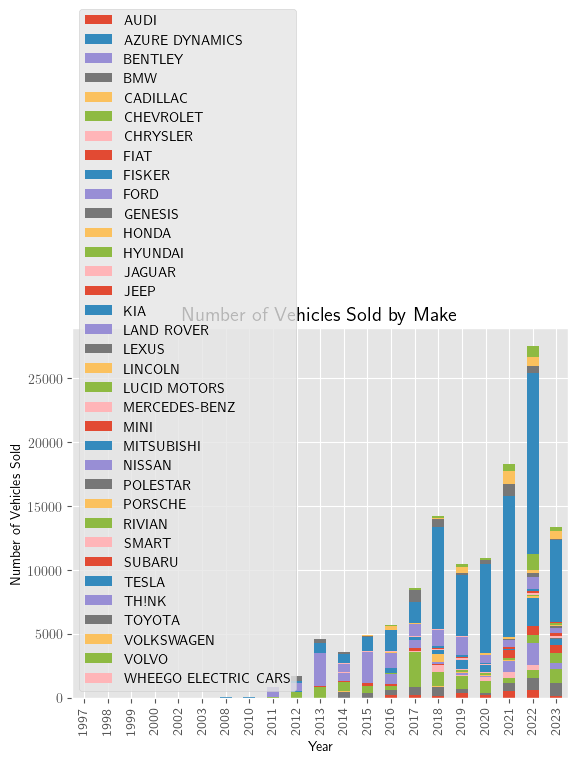

In [5]:
#Number Makes sold each year 
makeyear=df.copy()
# Group the DataFrame by 'Year' and 'Make' and calculate the count
grouped_df = makeyear.groupby(['Model Year', 'Make']).size().unstack()

# Plot a line graph for each make
grouped_df.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.title('Number of Vehicles Sold by Make')

# Show the legend
plt.legend()

# Show the plot
plt.show()


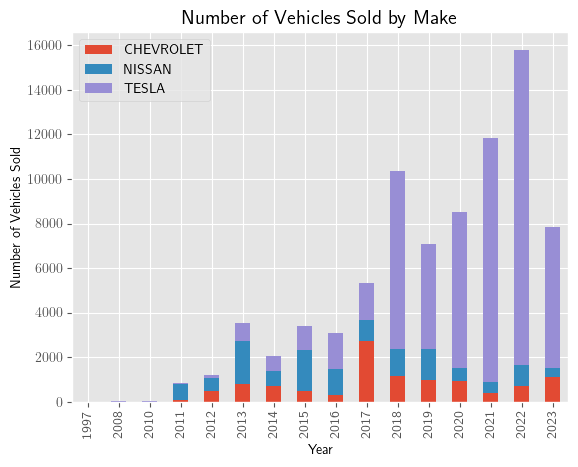

In [6]:
#Number Top 3 Makes sold each year 
make_df = df[(df['Make'] == 'NISSAN') | (df['Make'] == 'TESLA') | (df['Make'] == 'CHEVROLET')]

# Group the DataFrame by 'Year' and 'Make' and calculate the count
grouped_df = make_df.groupby(['Model Year', 'Make']).size().unstack()

# Plot a line graph for each make
grouped_df.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.title('Number of Vehicles Sold by Make')

# Show the legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='Make,Model'>

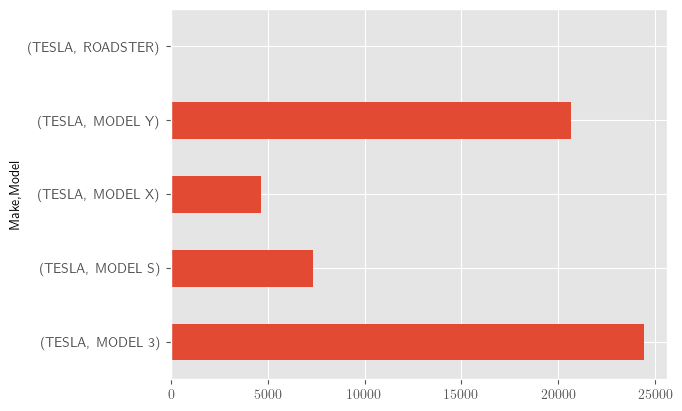

In [7]:
#Number of Tesla Models sold 
tesla_df = df[df['Make'] == 'TESLA']
series4= tesla_df.groupby(['Make', 'Model']).size()
series4.plot(kind='barh', stacked=True)

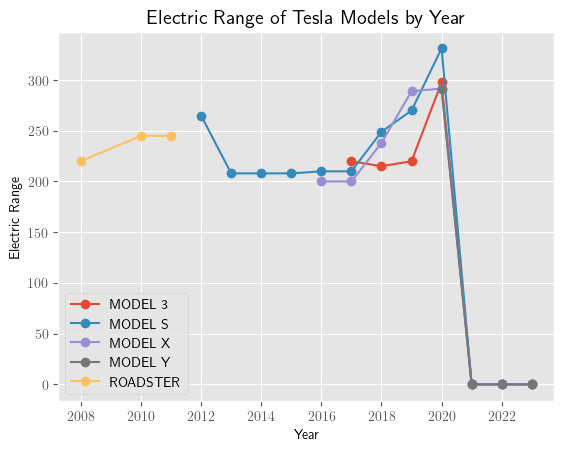

In [8]:
#We want to show Electric range of each tesla model over the years.
# Group the DataFrame by 'Year' and 'Model' and calculate the mean electric range
grouped_df = tesla_df.groupby(['Model Year', 'Model'])['Electric Range'].mean().unstack()

# Plot a line graph for each Tesla model
grouped_df.plot(marker='o')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Electric Range')
plt.title('Electric Range of Tesla Models by Year')

# Show the legend
plt.legend()

# Show the plot
plt.show()

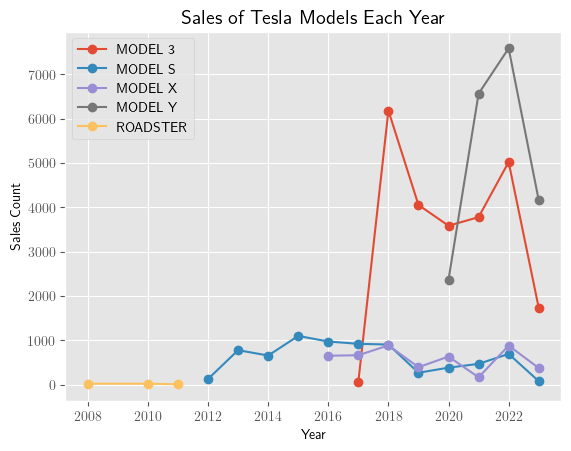

In [9]:
#We Want to show Sales of each tesla model over the year
# Group the DataFrame by 'Year' and 'Model' and calculate the count
grouped_df = tesla_df.groupby(['Model Year', 'Model']).size().unstack()

# Plot a line graph for Tesla models and their sales each year
grouped_df.plot(marker='o')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Sales of Tesla Models Each Year')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [10]:
# Assign the count values to a new column called 'Count'
df1['Count'] = df1.groupby(['Make', 'Model','Model Year']).transform('size')
df1

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Count
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,3583
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09,4052
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,393
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10,1831
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10,6179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124704,1N4AZ0CP0F,Chelan,Chelan,WA,98816.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,12.0,134852315,POINT (-120.01454 47.83985),PUD NO 1 OF CHELAN COUNTY,5.300796e+10,1831
124705,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,44.0,110108841,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10,3583
124708,WBY1Z4C54G,King,Seattle,WA,98144.0,2016,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,37.0,148555137,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,193
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,424


In [11]:
#Visualisation of the groupby. Using the mean since the mean of range and count will remain the same  nX/x=X=x̄
df2 = pd.DataFrame({'Make': df1['Make'], 'Model': df1['Model'],'Model Year' : df1['Model Year'] , 'Count': df1['Count'], 'Electric Range': df1['Electric Range']})
df2= df2.groupby(['Make', 'Model','Model Year']).mean()
df2

Count  \
Make                 Model                    Model Year          
AUDI                 E-TRON                   2019        407.0   
                                              2021        132.0   
                     E-TRON SPORTBACK         2020         25.0   
                                              2021         48.0   
AZURE DYNAMICS       TRANSIT CONNECT ELECTRIC 2011          4.0   
...                                                         ...   
VOLVO                S90                      2023          1.0   
                     V60                      2022          2.0   
                     XC60                     2022        118.0   
                     XC90                     2022        121.0   
WHEEGO ELECTRIC CARS WHEEGO                   2010          3.0   

                                                          Electric Range  
Make                 Model                    Model Year                  
AUDI                 E-TRON                   2019                 204.0  
                                              2021                 222.0  
                     E-TRON SPORTBACK         2020                 218.0  
                                              2021                 218.0  
AZURE DYNAMICS       TRANSIT CONNECT ELECTRIC 2011                  56.0  
...                                                                  ...  
VOLVO                S90                      2023                  38.0  
                     V60                      2022                  41.0  
                     XC60                     2022                  35.0  
                     XC90                     2022                  35.0  
WHEEGO ELECTRIC CARS WHEEGO                   2010                 100.0  

[163 rows x 2 columns]

In [12]:
#Range and cars sold per model correlation when only CAFV Eligible vehicles are included
correlation = df2['Count'].corr(df2['Electric Range'])
print(correlation)

0.3297753168773977


In [13]:
# Assign the count values to a new column called 'Count'
dfcorr=df.copy()
dfcorr['Count'] = df.groupby(['Make', 'Model','Model Year']).transform('size')
corr2 = pd.DataFrame({'Make': dfcorr['Make'], 'Model': dfcorr['Model'],'Model Year' : dfcorr['Model Year'] , 'Count': dfcorr['Count'], 'Electric Range': dfcorr['Electric Range']})
corr2=corr2.groupby(['Make', 'Model','Model Year']).mean()
correlation = corr2['Count'].corr(corr2['Electric Range'])
print(correlation)

0.17329289135756853
